In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

In [17]:
df=pd.read_csv("takehome_user_engagement.csv")
df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1.0,1.0
1,2013-11-15 03:45:04,2.0,1.0
2,2013-11-29 03:45:04,2.0,1.0
3,2013-12-09 03:45:04,2.0,1.0
4,2013-12-25 03:45:04,2.0,1.0
...,...,...,...
75567,2013-04-30 22:07:10,4263.0,1.0
75568,2013-05-01 22:07:10,4263.0,1.0
75569,2013-05-02 22:07:10,4263.0,1.0
75570,2013-05-03 22:07:10,4263.0,1.0


**Checking for adopted (who has logged into the product on three seperate days in at least one seven day period)**

**Changing time_stamp in dataframe to pandas datetime format**

In [20]:
df['time_stamp']=pd.to_datetime(df['time_stamp'])


*Grouping Users as per weekly window and finding the visit count as per weekly time frame...

In [23]:
f= df.groupby('user_id')
date=f.rolling('7D', on='time_stamp')['visited'].count()
date=date.to_frame().reset_index()

In [24]:
date

,user_id,time_stamp,visited
0,1.0,2014-04-22 03:53:30,1.0
1,2.0,2013-11-15 03:45:04,1.0
2,2.0,2013-11-29 03:45:04,1.0
3,2.0,2013-12-09 03:45:04,1.0
4,2.0,2013-12-25 03:45:04,1.0
...,...,...,...
75566,4263.0,2013-04-29 22:07:10,7.0
75567,4263.0,2013-04-30 22:07:10,7.0
75568,4263.0,2013-05-01 22:07:10,7.0
75569,4263.0,2013-05-02 22:07:10,7.0


# Finding adopted users who has logged into the product on three seperate days in a atleast one seven day period...


In [25]:
def adpuser(adopted):
  adopted=adopted.groupby('user_id')['visited'].max().reset_index()
  adopted_user=adopted
  adopted_user['adopted_user']=adopted['visited'].apply(lambda x: 1 if x>=3 else 0)
  return adopted_user
adopted_user=adpuser(date)

In [ ]:
adopted_user

,user_id,visited,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0
...,...,...,...
8818,11996,1.0,0
8819,11997,1.0,0
8820,11998,1.0,0
8821,11999,1.0,0


In [26]:
adopted_user.adopted_user.value_counts()


0    2561
1     573
Name: adopted_user, dtype: int64

In [27]:
adopted_user.drop('visited',axis=1,inplace=True)
adopted_user.rename({'user_id':'object_id'},axis=1,inplace=True)
adopted_user.set_index("object_id", inplace = True)

**Reading the takehome_user file and merging the adopted uder dataframe with it**

In [30]:
db=pd.read_csv("takehome_users.csv",encoding='latin-1')
db

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [31]:
user=db.join(adopted_user,how='left',on='object_id')
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                3134 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.0+ MB


In [32]:
user.fillna(0,inplace=True)


# Data cleaning...

In [33]:
user['last_session_creation_time'] =  user['last_session_creation_time'].apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d %H:%M:%S'))
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'])

In [34]:
user.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [35]:
user['creation_time'] = user['creation_time'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
user['creation_time'] = pd.to_datetime(user['creation_time'])
user.head()
     

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [36]:
src=list(user['creation_source'].unique())
for i in range(len(src)):  
    user['creation_source']=user['creation_source'].replace({src[i]:i})
     

In [37]:
user.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5240.0,0.0


**Finding Alternative days ***

In [38]:
user['active_days']=(user['last_session_creation_time'].sub(user['creation_time'])).dt.days
col =user.pop('active_days')
user.insert(9,'active_days', col)
for i in range(len(user['active_days'])):
   if user['active_days'][i]<0:
      user['active_days'][i]=0


<ipython-input-38-54b1387bfea8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user['active_days'][i]=0


In [39]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active_days,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,0,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,136,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,0,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5,5240.0,0.0


 **Finding corelation between all columns with the adopted user ***

In [40]:
user.corr()['adopted_user']


object_id                    -0.246237
creation_source              -0.023156
opted_in_to_mailing_list      0.011774
enabled_for_marketing_drip    0.007053
org_id                        0.032575
active_days                   0.459263
invited_by_user_id            0.012075
adopted_user                  1.000000
Name: adopted_user, dtype: float64

***Its seen from above that following column has more correlation to adopted_user...

1)org_idopted_in_to_mailing_list

2)enabled_for_marketing_drip

3)org_id

4)invited_by_user_id

5)active_days



****Exploratory Data Analysis****


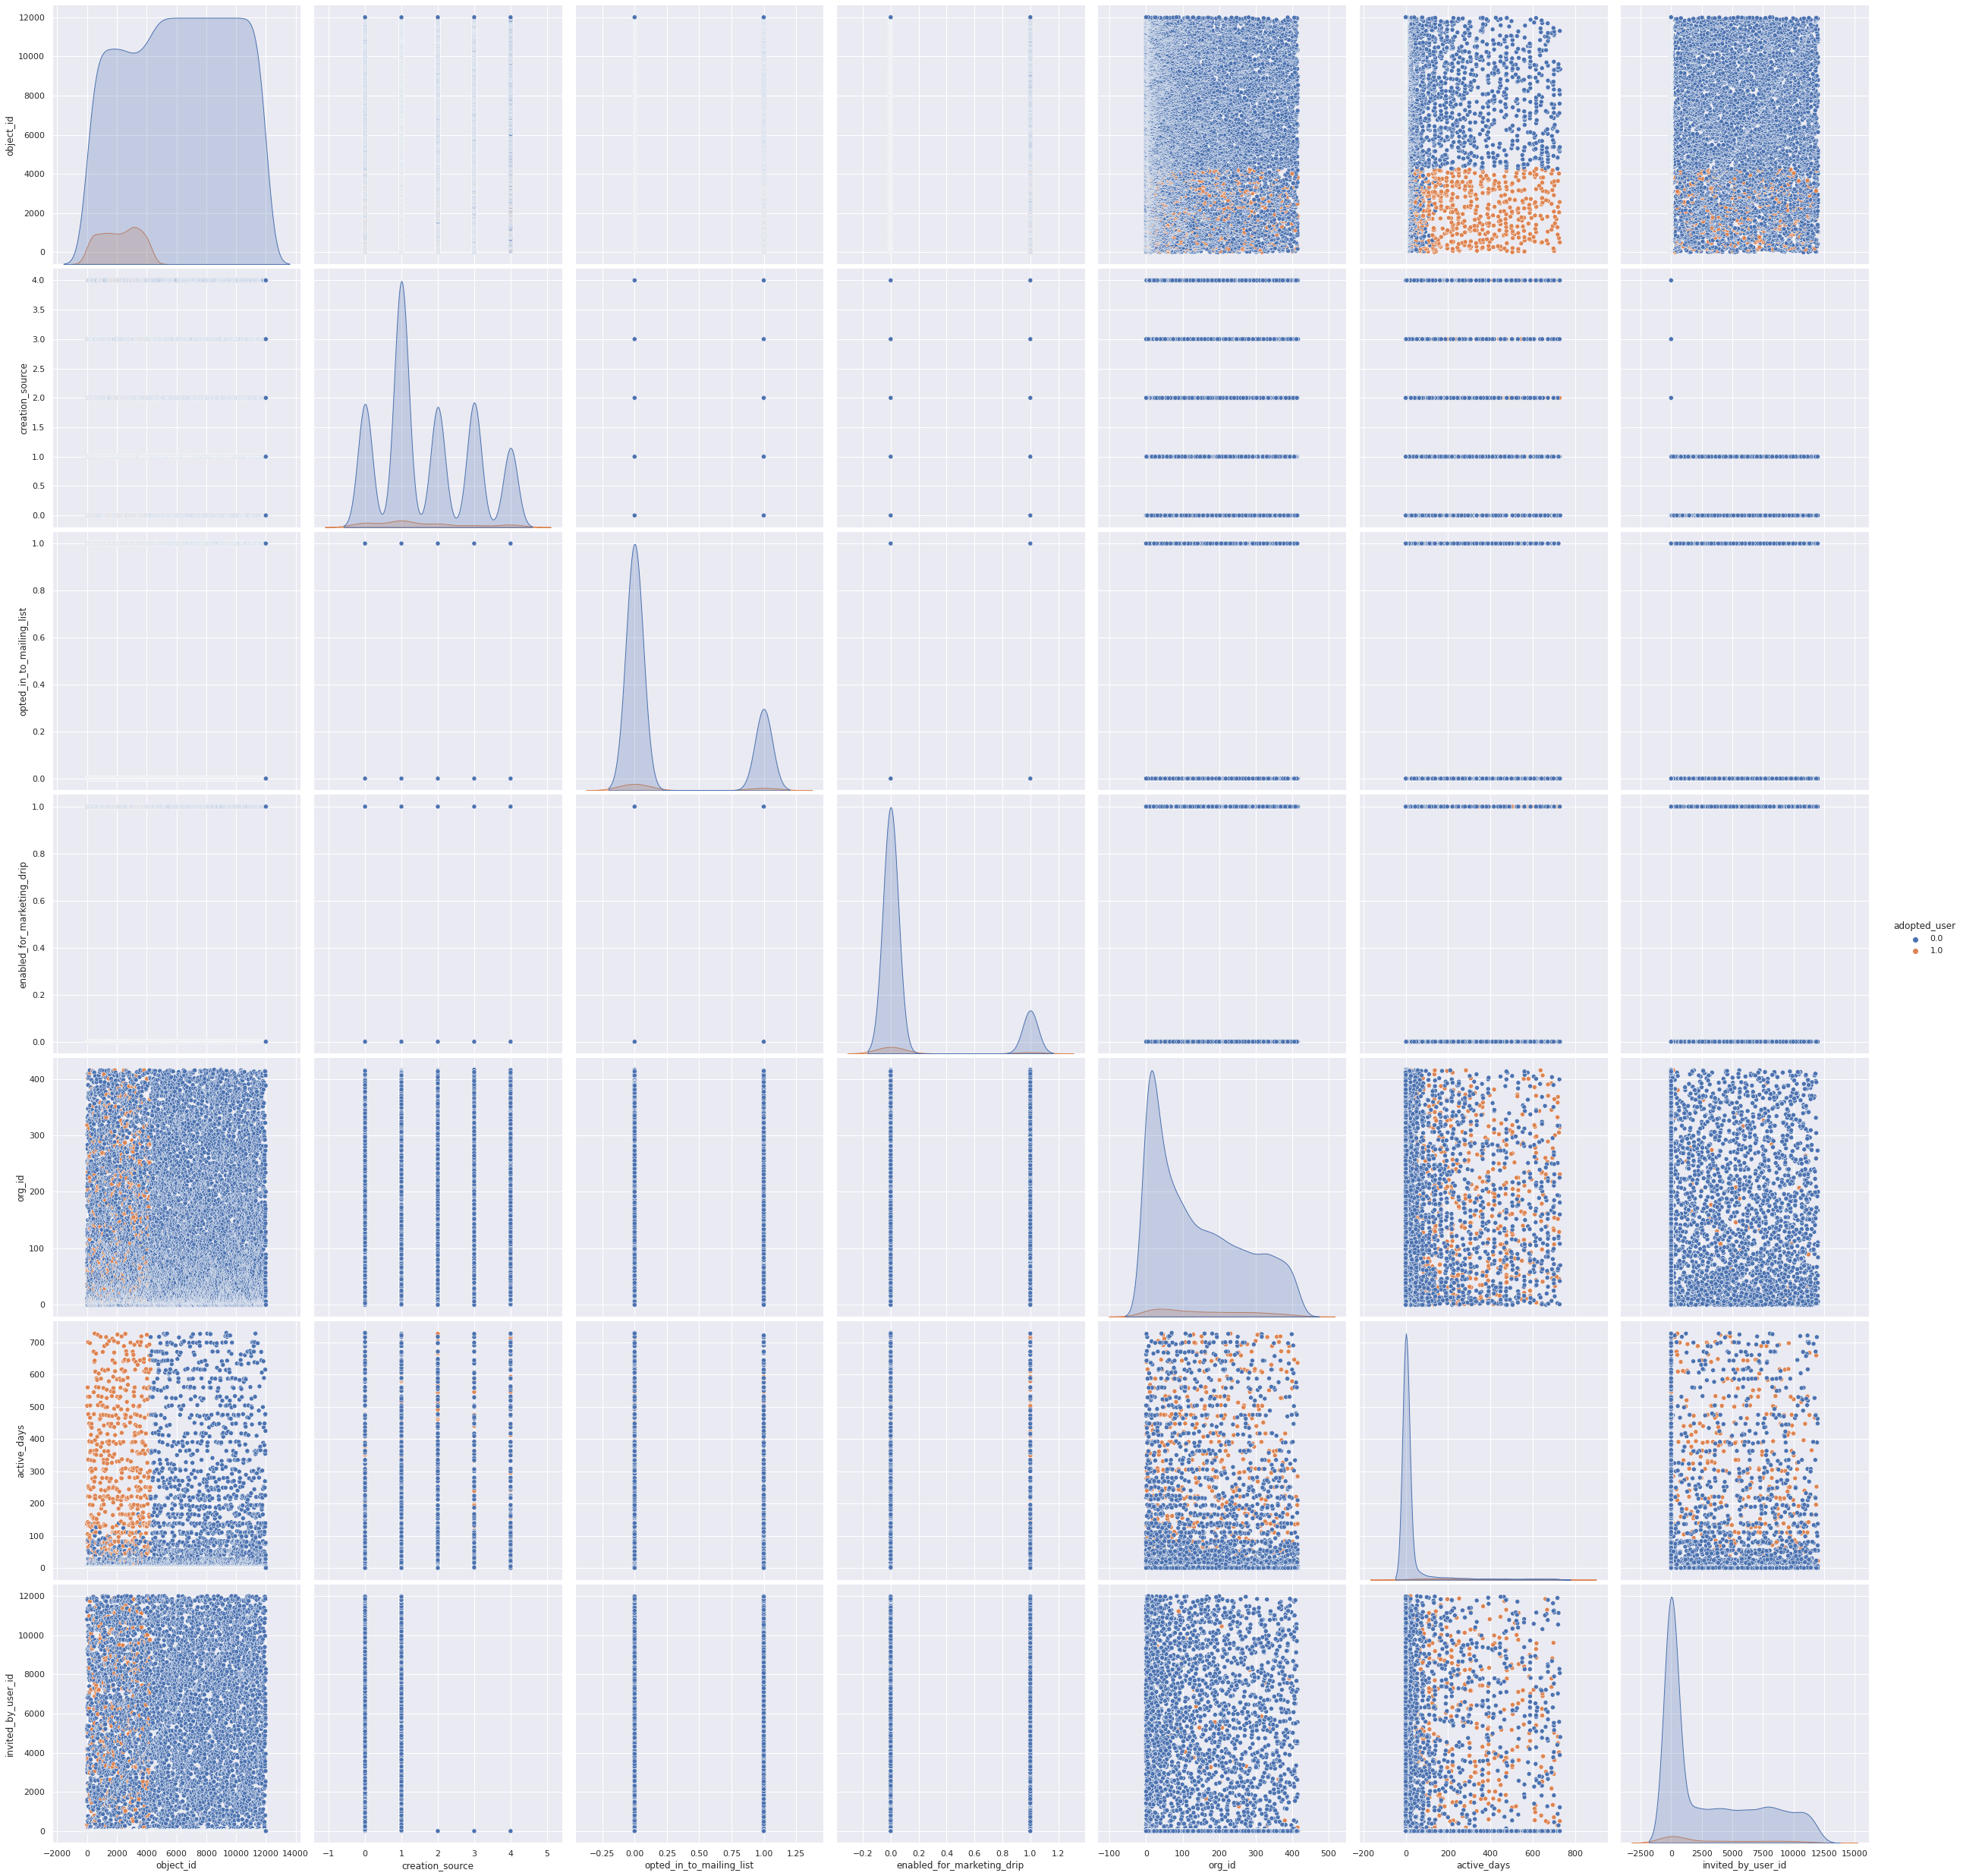

In [41]:
sns.pairplot(user, hue="adopted_user",height=5)
plt.show()

**From the above plot we can conclude org_id, invited_by_id, opting to mail list, enable for marketing drip, active_days and creation source are the feautures which can seperate the data very well. **bold text**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


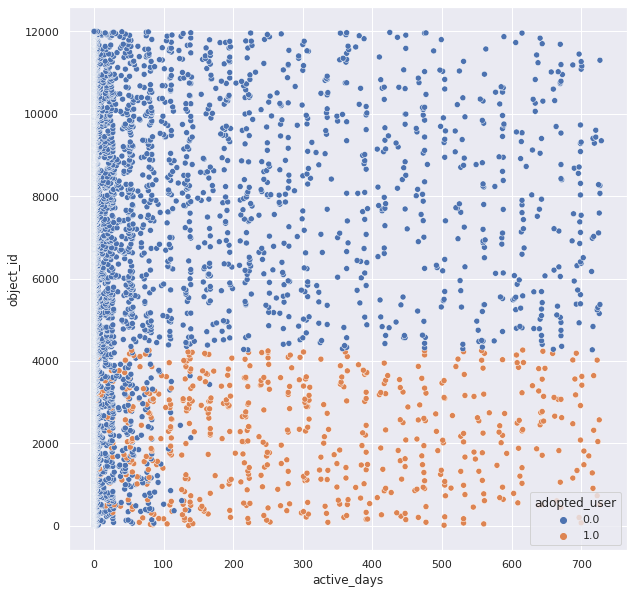

In [42]:
figure=plt.figure(figsize=(10,10))
sns.scatterplot(user['active_days'],user['object_id'],user['adopted_user'])
plt.show()

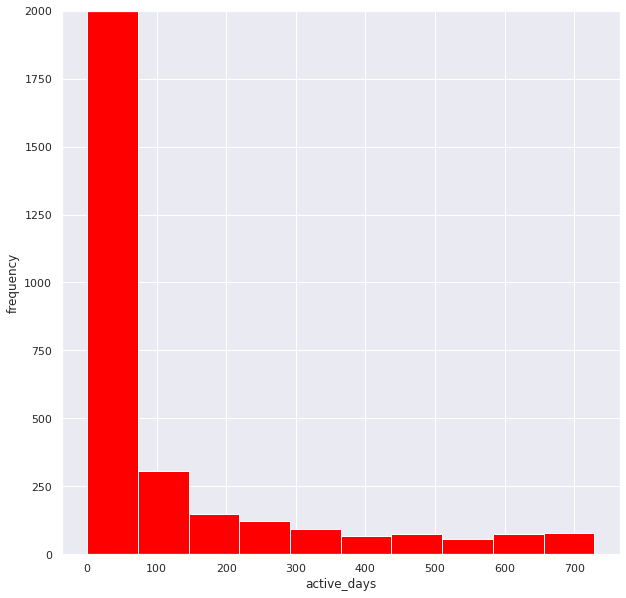

In [43]:
fig=plt.figure(figsize=(10,10))
plt.hist(user.active_days[user['adopted_user']==1],color='blue')
plt.hist(user.active_days[user['adopted_user']==0],color='red')
plt.xlabel("active_days")
plt.ylabel("frequency")
plt.ylim(0,2000)
plt.show()

**Object_id with more active time are mostly adopted users and more active days has more adopted users**bold text**


In [44]:
arr=list(df1.creation_source.unique())
ind = np.arange(len(arr)) 
     

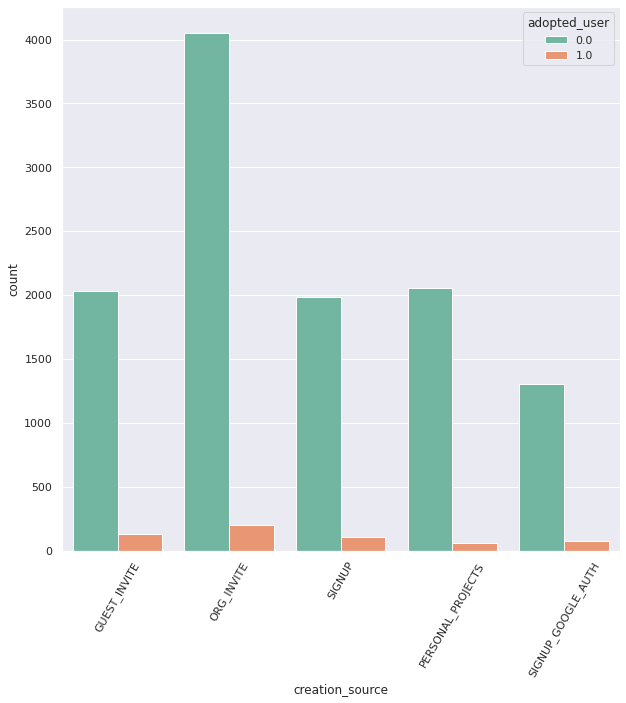

In [45]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x='creation_source', data=user,hue='adopted_user', palette='Set2')
plt.xticks(ind,labels=arr,rotation=60)
plt.show()

**Creation source doesn't have much impact on adopted user**

**Let us try the Logistic regression and find important features**

In [49]:
import statsmodels.api as s


In [50]:
x=user[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','active_days','invited_by_user_id']]
y=user['adopted_user']

In [51]:
x_cons=s.add_constant(x)


In [52]:
x_log=s.Logit(y,x_cons)
res_log=x_log.fit()
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.142954
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           adopted_user   No. Observations:                12000
Model:                          Logit   Df Residuals:                    11993
Method:                           MLE   Df Model:                            6
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.2548
Time:                        15:19:35   Log-Likelihood:                -1715.4
converged:                       True   LL-Null:                       -2302.0
Covariance Type:            nonrobust   LLR p-value:                3.049e-250
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.7455      0.156    -23.993      0.000      -4.051      -3.440
creation_source               -0.0977      0.050     -1.945      0.052      -0.196       0.001
opted_in_to_mailing_list       0.1466      0.126      1.162      0.245      -0.101       0.394
enabled_for_marketing_drip    -0.0387      0.154     -0.252      0.801      -0.340       0.263
org_id                         0.0005      0.000      1.364      0.173      -0.000       0.001
active_days                    0.0068      0.000     34.070      0.000       0.006       0.007
invited_by_user_id         -9.595e-06   1.67e-05     -0.575      0.565   -4.23e-05    2.31e-05
==============================================================================================
"""

In [54]:
print("Regression Coefficients are:'\n\n")
r=res_log.params[1:]
print(res_log.params[1:],'\n\n')
con_mat=res_log.pred_table()
con_mat
print("Accuracy on training data:'\n\n")
accuracy_train=100*(con_mat[0,0]+con_mat[1,1])/con_mat.sum()
print("Accuracy : ",accuracy_train)

Regression Coefficients are:'


creation_source              -0.097689
opted_in_to_mailing_list      0.146638
enabled_for_marketing_drip   -0.038684
org_id                        0.000538
active_days                   0.006772
invited_by_user_id           -0.000010
dtype: float64 


Accuracy on training data:'


Accuracy :  94.50833333333334


In [55]:
result=r.to_frame().reset_index()
a=list(result['index'])
b=list(result[0])

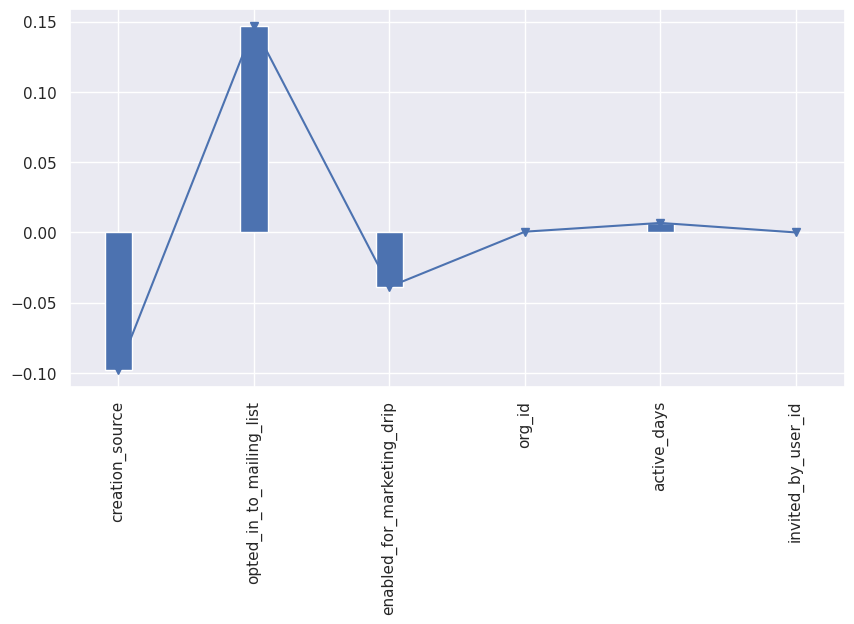

In [56]:
fig=plt.figure(figsize=(10,5),dpi=100)
plt.plot(a,b,marker='v')
plt.bar(a,b,width=0.2)
plt.xticks(rotation=90)
plt.show()
     

# Results
   **I used the algorithm Logistics Regression since the user is adopted (1) or not (0). The features are 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'days_since_signup',active_days,invited_by_user_id.**




# > Accuracy score and regression coefficients are:


















In [58]:
print("Accuracy on training data:'\n\n")
print("Accuracy : ",accuracy_train,'\n\n')
print("Regression Coefficients are:'\n\n")
print(res_log.params[1:])

Accuracy on training data:'


Accuracy :  94.50833333333334 


Regression Coefficients are:'


creation_source              -0.097689
opted_in_to_mailing_list      0.146638
enabled_for_marketing_drip   -0.038684
org_id                        0.000538
active_days                   0.006772
invited_by_user_id           -0.000010
dtype: float64


# Observation

1)-**From the above plot its clear that Opting_into_mailing_list and and active days increase the odds of being adopted user**

2)-**Others like creation_source,org_id and invited by user only has slight impact in increasing the odds of adopted user.**

3)-**Only the enabling_for marketing_drip has odds of nat being an adopted user**

# Future Research/Data:
**Further informations that helps to increase the odds of being the adopted user can be**

1)-**Gender that has more adopted user**

2)-**Age**

3)-**organisation that has more adopted user**

4)-**Particular field to which the user belong that attracts them to become an adopted user**

5)-**Location of the user**

6)-**salary details**


